# readme

这个是光子密度进行叠加的程序，以下程序属于在x轴上进行叠加，叠加范围是：y，z均取-2，2微米，即 z ∈ [−2, 2] and y ∈ [−2, 2] μm  进行叠加 

Absorption_Fraction_of_Laser_Energy_Absorbed____ <class 'sdf.BlockConstant'> [1]
Absorption_Total_Laser_Energy_Injected__J_ <class 'sdf.BlockConstant'> [1]
CPUs_Current_rank <class 'sdf.BlockPlainVariable'> [0, 0, 0]
CPUs_Original_rank <class 'sdf.BlockPlainVariable'> [ 1,  7, 20]
Derived_Average_Particle_Energy_Electron <class 'sdf.BlockPlainVariable'> [1500, 1000, 1000]
Derived_Average_Particle_Energy_Ion_H <class 'sdf.BlockPlainVariable'> [1500, 1000, 1000]
Derived_Average_Particle_Energy_Photon <class 'sdf.BlockPlainVariable'> [1500, 1000, 1000]
Derived_Number_Density_Electron <class 'sdf.BlockPlainVariable'> [1500, 1000, 1000]
Derived_Number_Density_Ion_H <class 'sdf.BlockPlainVariable'> [1500, 1000, 1000]
Derived_Number_Density_Photon <class 'sdf.BlockPlainVariable'> [1500, 1000, 1000]
Grid_CPUs_Original_rank <class 'sdf.BlockPlainMesh'> [ 2,  8, 21]
Grid_CPUs_Original_rank_mid <class 'sdf.BlockPlainMesh'> [ 1,  7, 20]
Grid_Grid <class 'sdf.BlockPlainMesh'> [1501, 1001, 1001]
Gri

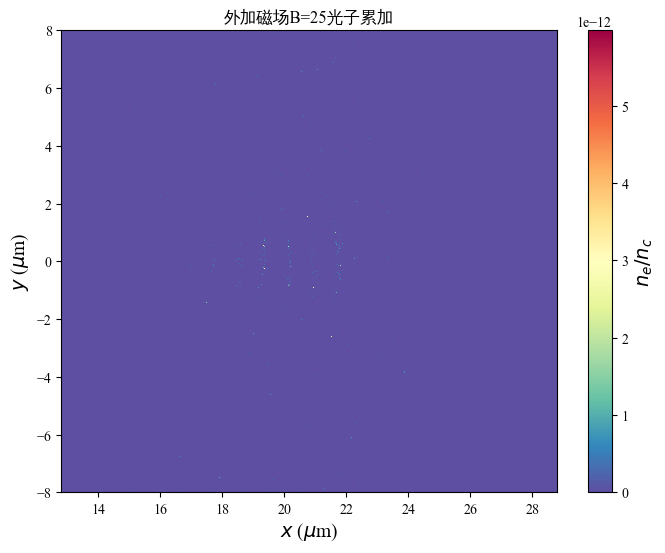

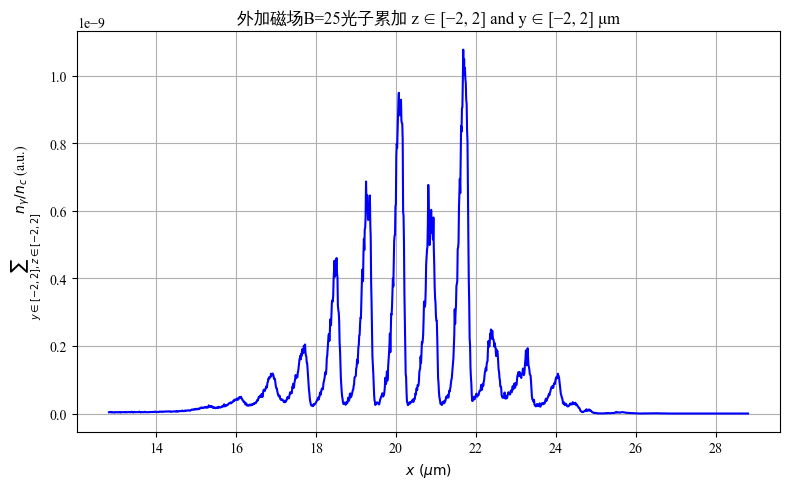

In [5]:
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import os

# 设定数据文件的路径和文件名模式
base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024a/10kev无磁场'
file_prefix = 'density'
file_suffix = '.sdf'
file_index = 18

file_name = f"{file_prefix}{file_index:04d}{file_suffix}"
file_path = os.path.join(base_path, file_name)

# 读取数据
den_crit = 0.17419597124e28
Density_Data = sh.getdata(file_path)
sh.list_variables(Density_Data)

ne = Density_Data.Derived_Number_Density_Photon.data / den_crit
E =  Density_Data.Derived_Average_Particle_Energy_Photon.data
ne = ne*E

x = Density_Data.Grid_Grid_mid.data[0] / (1e-6)  # 归一化
y = Density_Data.Grid_Grid_mid.data[1] / (1e-6)
z = Density_Data.Grid_Grid_mid.data[2] / (1e-6)

# 切片
x_indices = slice(0, ne.shape[0])
x_values = x[x_indices]
y_indices = slice(0, ne.shape[1])
y_values = y[y_indices]
ne_slice = ne[x_indices, y_indices, 500]

X, Y = np.meshgrid(x_values, y_values, indexing='ij')

# 创建图像和子图
fig, ax = plt.subplots(figsize=(8, 6))

# 显示密度图
# 设置色标范围的方式：自动或手动
auto_scale = True  # 设置为 True 时自动调整色标范围，设置为 False 时手动设置色标范围
if auto_scale:
    vmin = np.min(ne_slice) * 0.9  # 色标最小值稍微低于数据最小值
    vmax = np.max(ne_slice) * 0.5
else:
    vmin = 0.0  # 手动设置最小值
    vmax = 5.0  # 手动设置最大值

c = ax.pcolormesh(X, Y, ne_slice, shading='auto', cmap='Spectral_r', vmin=vmin, vmax=vmax)

# 添加颜色条
cbar = plt.colorbar(c, ax=ax, label='$n_e / n_c$')
cbar.set_label('$n_e / n_c$', fontsize=14)  # 设置色标标签

# 设置标签和标题
ax.set_xlabel(r'$x$ ($\mu$m)', fontsize=14)
ax.set_ylabel(r'$y$ ($\mu$m)', fontsize=14)
ax.set_title('外加磁场B=25光子累加')

plt.show()

# ---- 找到 y 在 -2 到 2 微米对应的索引范围 ----
y_min, z_min = -2, -2  # 单位：微米
y_max, z_max = 2, 2

# 获取对应索引
y_indices_range = np.where((y >= y_min) & (y <= y_max))[0]
y_start = y_indices_range[0]
y_end = y_indices_range[-1] + 1  # Python切片不包括结束索引（左闭右开）

z_indices_range = np.where((z >= z_min) & (z <= z_max))[0]
z_start = z_indices_range[0]
z_end = z_indices_range[-1] + 1  # Python切片不包括结束索引（左闭右开）

# ---- 对 y (选中范围) 和 z 求和 ----
ne_sum_partial_y = np.sum(ne[:, y_start:y_end, z_start:z_end], axis=(1, 2))  # 只在选定 y 区域和整个 z 上求和

# ---- 截取对应 x 区间 ----
x_values = x

# ---- 绘图 ----
plt.figure(figsize=(8, 5))
plt.plot(x_values, ne_sum_partial_y, color='blue')
plt.xlabel(r'$x\ (\mu\mathrm{m})$')
plt.ylabel(r'$\sum_{y\in[-2,2],z\in[-2,2]} n_\gamma / n_c$ (a.u.)')
plt.title('外加磁场B=25光子累加 z ∈ [−2, 2] and y ∈ [−2, 2] μm')
plt.grid(True)
plt.tight_layout()
plt.show()

Reading file /media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024ab+2/density0018.sdf
t() = time
x(1501, 1001, 1001) = grid
y(1501, 1001, 1001) = grid
z(1501, 1001, 1001) = grid
xc(1500, 1000, 1000) = grid_mid
yc(1500, 1000, 1000) = grid_mid
zc(1500, 1000, 1000) = grid_mid
Absorption_Fraction_of_Laser_Energy_Absorbed____ <class 'sdf.BlockConstant'> [1]
Absorption_Total_Laser_Energy_Injected__J_ <class 'sdf.BlockConstant'> [1]
CPUs_Current_rank <class 'sdf.BlockPlainVariable'> [0, 0, 0]
CPUs_Original_rank <class 'sdf.BlockPlainVariable'> [ 3,  1, 50]
Derived_Average_Particle_Energy_Electron <class 'sdf.BlockPlainVariable'> [1500, 1000, 1000]
Derived_Average_Particle_Energy_Ion_H <class 'sdf.BlockPlainVariable'> [1500, 1000, 1000]
Derived_Average_Particle_Energy_Photon <class 'sdf.BlockPlainVariable'> [1500, 1000, 1000]
Derived_Number_Density_Electron <class 'sdf.BlockPlainVariable'> [1500, 1000, 1000]
Derived_Number_Density_Ion_H <class 'sdf.BlockPlainVariable'> [15

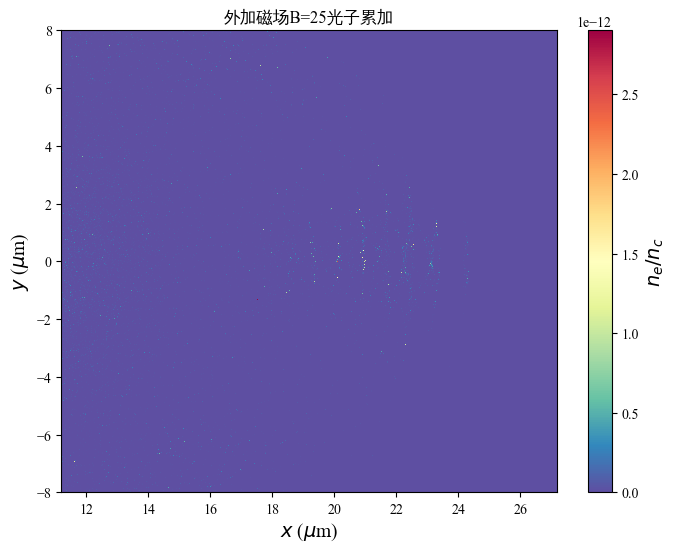

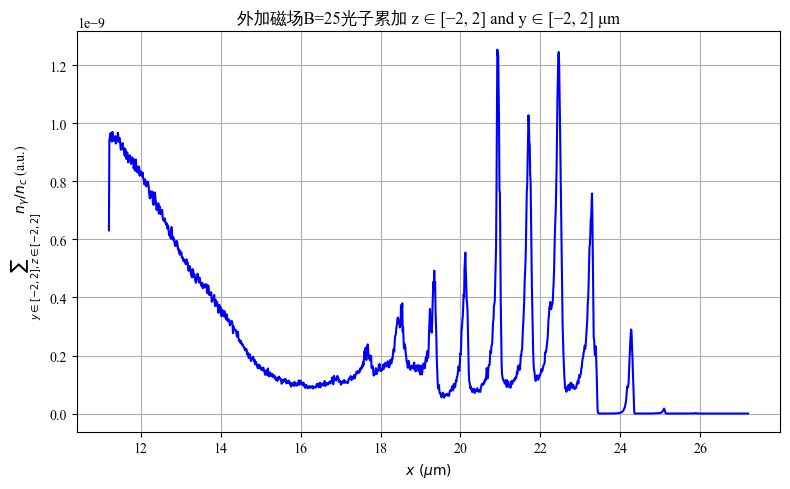

In [6]:
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import os

# 设定数据文件的路径和文件名模式
base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/ju2024ab+2'
file_prefix = 'density'
file_suffix = '.sdf'
file_index = 18

file_name = f"{file_prefix}{file_index:04d}{file_suffix}"
file_path = os.path.join(base_path, file_name)

# 读取数据
den_crit = 0.17419597124e28
Density_Data = sh.getdata(file_path)
sh.list_variables(Density_Data)

ne = Density_Data.Derived_Number_Density_Photon.data / den_crit
E =  Density_Data.Derived_Average_Particle_Energy_Photon.data
ne = ne*E

x = Density_Data.Grid_Grid_mid.data[0] / (1e-6)  # 归一化
y = Density_Data.Grid_Grid_mid.data[1] / (1e-6)
z = Density_Data.Grid_Grid_mid.data[2] / (1e-6)

# 切片
x_indices = slice(0, ne.shape[0])
x_values = x[x_indices]
y_indices = slice(0, ne.shape[1])
y_values = y[y_indices]
ne_slice = ne[x_indices, y_indices, 500]

X, Y = np.meshgrid(x_values, y_values, indexing='ij')

# 创建图像和子图
fig, ax = plt.subplots(figsize=(8, 6))

# 显示密度图
# 设置色标范围的方式：自动或手动
auto_scale = True  # 设置为 True 时自动调整色标范围，设置为 False 时手动设置色标范围
if auto_scale:
    vmin = np.min(ne_slice) * 0.9  # 色标最小值稍微低于数据最小值
    vmax = np.max(ne_slice) * 0.5
else:
    vmin = 0.0  # 手动设置最小值
    vmax = 5.0  # 手动设置最大值

c = ax.pcolormesh(X, Y, ne_slice, shading='auto', cmap='Spectral_r', vmin=vmin, vmax=vmax)

# 添加颜色条
cbar = plt.colorbar(c, ax=ax, label='$n_e / n_c$')
cbar.set_label('$n_e / n_c$', fontsize=14)  # 设置色标标签

# 设置标签和标题
ax.set_xlabel(r'$x$ ($\mu$m)', fontsize=14)
ax.set_ylabel(r'$y$ ($\mu$m)', fontsize=14)
ax.set_title('外加磁场B=25光子累加')

plt.show()

# ---- 找到 y 在 -2 到 2 微米对应的索引范围 ----
y_min, z_min = -2, -2  # 单位：微米
y_max, z_max = 2, 2

# 获取对应索引
y_indices_range = np.where((y >= y_min) & (y <= y_max))[0]
y_start = y_indices_range[0]
y_end = y_indices_range[-1] + 1  # Python切片不包括结束索引（左闭右开）

z_indices_range = np.where((z >= z_min) & (z <= z_max))[0]
z_start = z_indices_range[0]
z_end = z_indices_range[-1] + 1  # Python切片不包括结束索引（左闭右开）

# ---- 对 y (选中范围) 和 z 求和 ----
ne_sum_partial_y = np.sum(ne[:, y_start:y_end, z_start:z_end], axis=(1, 2))  # 只在选定 y 区域和整个 z 上求和

# ---- 截取对应 x 区间 ----
x_values = x

# ---- 绘图 ----
plt.figure(figsize=(8, 5))
plt.plot(x_values, ne_sum_partial_y, color='blue')
plt.xlabel(r'$x\ (\mu\mathrm{m})$')
plt.ylabel(r'$\sum_{y\in[-2,2],z\in[-2,2]} n_\gamma / n_c$ (a.u.)')
plt.title('外加磁场B=25光子累加 z ∈ [−2, 2] and y ∈ [−2, 2] μm')
plt.grid(True)
plt.tight_layout()
plt.show()